#Aplicación de análisis de Fourier

### IGPOSE

El Índice Global de Personal Ocupado de los Sectores Económicos (IGPOSE) en México, es uno de los índices con los que trabajo, además, se calcula de manera mensual, por lo que considero que sería idoneo para las series de tiempo.
Se puede consultar en la siguiente página:
https://www.inegi.org.mx/temas/personalo/#Informacion_general


In [2]:
import pandas as pd
#Explorando los datos
data = pd.read_csv('s10_inegi_IGPOSE.csv')
# Asignar nombres a las columnas
data.columns = ['Anio', 'Mes', 'IGPOSE']
#data.head
print(data)

     Anio        Mes   IGPOSE
0    2008      Enero   99.820
1    2008    Febrero   99.844
2    2008      Marzo  100.436
3    2008      Abril  100.152
4    2008       Mayo  100.182
..    ...        ...      ...
177  2022    Octubre  108.149
178  2022  Noviembre  108.086
179  2022  Diciembre  107.816
180  2023      Enero  107.529
181  2023    Febrero  107.784

[182 rows x 3 columns]


explorando los datos se observan 3 columnas, Anio, Mes e IGPOSE, inicia de enero 2008 hasta febrero 2023

In [3]:
# Diccionario para mapear los nombres de los meses a números
meses_a_numeros = {
    'Enero': 1,
    'Febrero': 2,
    'Marzo': 3,
    'Abril': 4,
    'Mayo': 5,
    'Junio': 6,
    'Julio': 7,
    'Agosto': 8,
    'Septiembre': 9,
    'Octubre': 10,
    'Noviembre': 11,
    'Diciembre': 12,
}

# Reemplazar los nombres de los meses por los números
data['Mes'] = data['Mes'].replace(meses_a_numeros)
print(data)

     Anio  Mes   IGPOSE
0    2008    1   99.820
1    2008    2   99.844
2    2008    3  100.436
3    2008    4  100.152
4    2008    5  100.182
..    ...  ...      ...
177  2022   10  108.149
178  2022   11  108.086
179  2022   12  107.816
180  2023    1  107.529
181  2023    2  107.784

[182 rows x 3 columns]


In [4]:
#librerias
import numpy as np
import matplotlib.pyplot as plt
import datetime



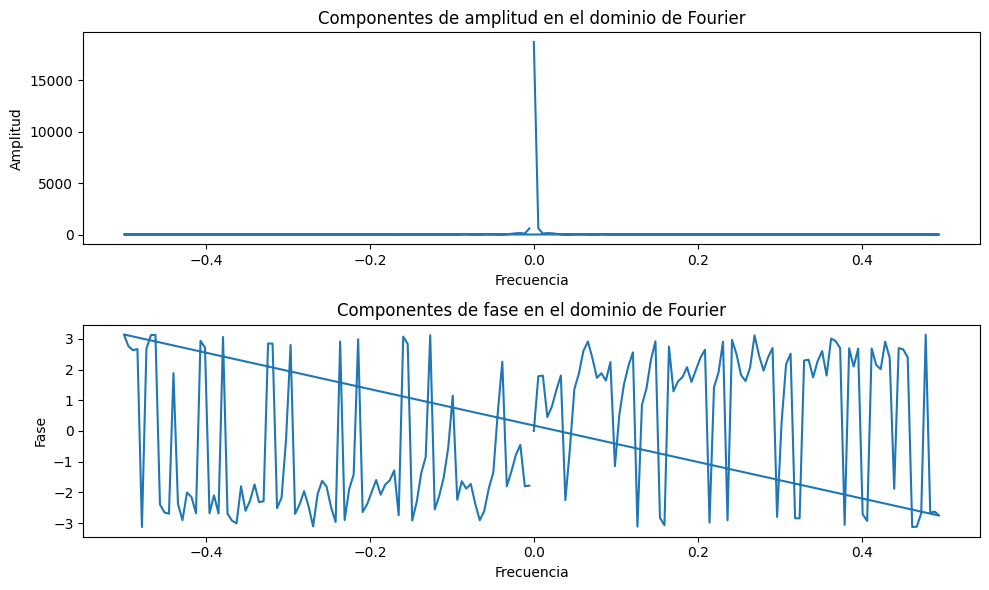

In [23]:
# Crear una serie de tiempo desde los datos
time_series = pd.to_datetime(data["Anio"].astype(str) + "-" + data["Mes"].astype(str))
#print(time_series)
values = data["IGPOSE"]

# Calcular la transformada de Fourier
fft_values = np.fft.fft(values)
freq = np.fft.fftfreq(len(values))

# Obtener los componentes de amplitud y fase
amplitudes = np.abs(fft_values)
phases = np.angle(fft_values)

# Graficar los componentes de amplitud y fase
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(freq, amplitudes)
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.title("Componentes de amplitud en el dominio de Fourier")
plt.subplot(2, 1, 2)
plt.plot(freq, phases)
plt.xlabel("Frecuencia")
plt.ylabel("Fase")
plt.title("Componentes de fase en el dominio de Fourier")
plt.tight_layout()
plt.show()


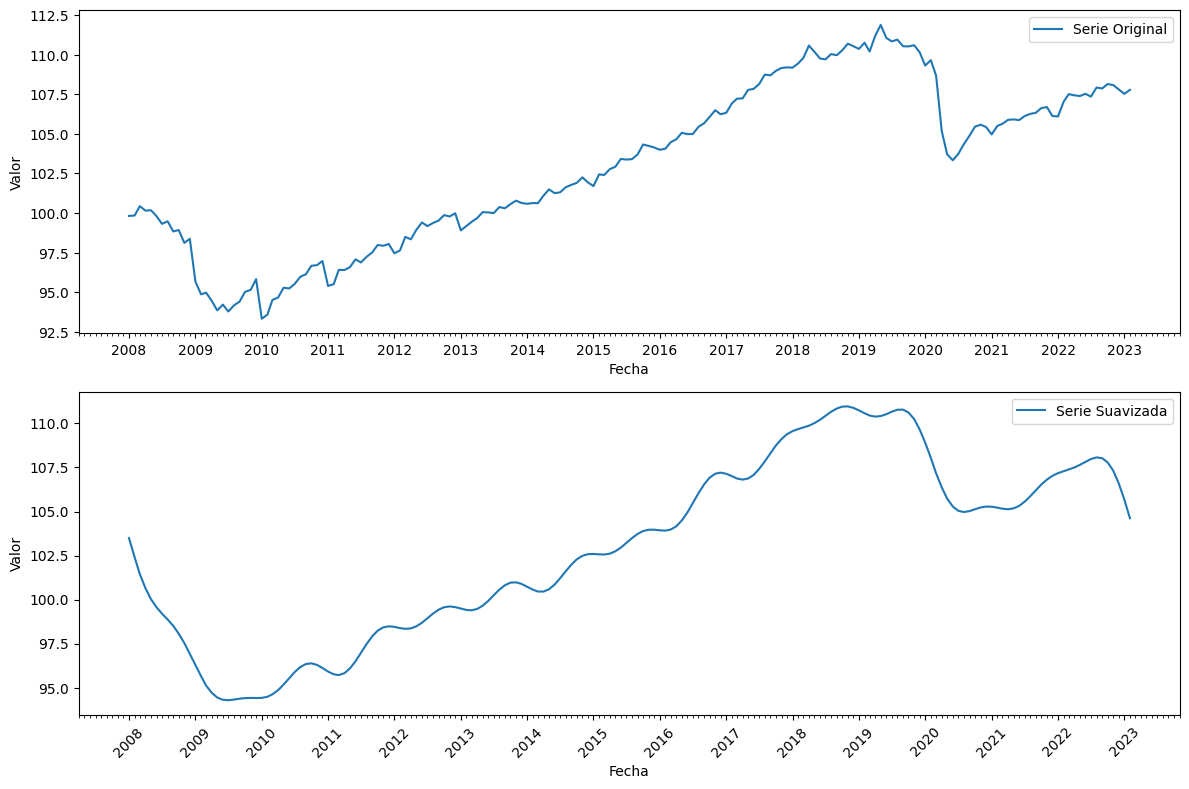

In [30]:
# serie de tiempo
data['Fecha'] = pd.to_datetime(data["Anio"].astype(str) + "-" + data["Mes"].astype(str))

# Obtener los valores de la serie de tiempo
serie_original = data['IGPOSE'].values

# Calcular la transformada de Fourier
fft = np.fft.fft(serie_original)
frecuencias = np.fft.fftfreq(len(serie_original))

# Calcular el espectro de amplitud
espectro_amplitud = np.abs(fft)

# Obtener el índice de las frecuencias principales
indices_principales = np.argsort(espectro_amplitud)[::-1]

# Filtrar las frecuencias principales 
num_frecuencias_a_considerar = int(len(serie_original) * 0.10)  # considerando el 10% de las frecuencias
fft_filtrado = np.zeros_like(fft)
fft_filtrado[indices_principales[:num_frecuencias_a_considerar]] = fft[indices_principales[:num_frecuencias_a_considerar]]

# Calcular la transformada inversa de Fourier
serie_suavizada = np.fft.ifft(fft_filtrado).real

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Grafica de la serie original
ax1.plot(data['Fecha'], serie_original, label='Serie Original')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Valor')
ax1.legend()

# Grafica de la serie suavizada
ax2.plot(data['Fecha'], serie_suavizada, label='Serie Suavizada')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Valor')
ax2.legend()

import matplotlib.dates as mdates
# Establecer particiones en el eje x
ax1.xaxis.set_major_locator(mdates.YearLocator())  # Particiones por año
ax1.xaxis.set_minor_locator(mdates.MonthLocator())  # Particiones por mes
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato del eje x

ax2.xaxis.set_major_locator(mdates.YearLocator())  # Particiones por año
ax2.xaxis.set_minor_locator(mdates.MonthLocator())  # Particiones por mes
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato del eje x

# Ajustar las etiquetas en el eje x
plt.xticks(rotation=45)

# Mostrar la figura
plt.tight_layout()
plt.show()


Se puede observar que no hay una tendencia creciente como una onda, la cual donde crece y disminuye un poco a través de los años, pero existe una disminución del personal ocupado en el 2009 y en el 2020, prbablemente por la crisis economica de 2008-2009 y la pandemia del 2020-2021